## Exercises ch 37 combining tables 

>1. Install and load the __Lahman__ library. This database includes data related to Baseball teams. It includes summary statistics about how the players performed on offense and defense for several years. It also includes personal information about the players.
>
>    The `Batting` data frame contains the offensive statistics for all players for many years. You can see, for example, the top 10 hitters by running this code:
>    
>    ```r
>    library(Lahman)
>    
>    top <- Batting %>% 
>      filter(yearID == 2016) %>%
>      arrange(desc(HR)) %>%
>      slice(1:10)
>    
>    top %>% tbl_df
>    ```
>
>    But who are these players? We see an ID, but not the names. The player names are in this table>
>
>    ```r
>    Master %>% as_tibble()
>    ```
>
>    We can see column names `nameFirst` and `nameLast`. Use the `left_join` function to create a table of the top home run hitters. The table should have `playerID`, first name, last name, and number of home runs (HR).  Rewrite the object `top` with this new table.    

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
#install.packages("Lahman")

In [2]:
library(Lahman)

In [3]:
str(Batting)

'data.frame':	102816 obs. of  22 variables:
 $ playerID: chr  "abercda01" "addybo01" "allisar01" "allisdo01" ...
 $ yearID  : int  1871 1871 1871 1871 1871 1871 1871 1871 1871 1871 ...
 $ stint   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID  : Factor w/ 149 levels "ALT","ANA","ARI",..: 136 111 39 142 111 56 111 24 56 24 ...
 $ lgID    : Factor w/ 7 levels "AA","AL","FL",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ G       : int  1 25 29 27 25 12 1 31 1 18 ...
 $ AB      : int  4 118 137 133 120 49 4 157 5 86 ...
 $ R       : int  0 30 28 28 29 9 0 66 1 13 ...
 $ H       : int  0 32 40 44 39 11 1 63 1 13 ...
 $ X2B     : int  0 6 4 10 11 2 0 10 1 2 ...
 $ X3B     : int  0 0 5 2 3 1 0 9 0 1 ...
 $ HR      : int  0 0 0 2 0 0 0 0 0 0 ...
 $ RBI     : int  0 13 19 27 16 5 2 34 1 11 ...
 $ SB      : int  0 8 3 1 6 0 0 11 0 1 ...
 $ CS      : int  0 1 1 1 2 1 0 6 0 0 ...
 $ BB      : int  0 4 2 0 2 0 1 13 0 0 ...
 $ SO      : int  0 0 5 2 1 1 0 1 0 0 ...
 $ IBB     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ H

In [4]:
top <- Batting %>% filter(yearID == 2016) %>% arrange(desc(HR)) %>% slice(1:10)

In [5]:
top %>% as_tibble()

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
trumbma01,2016,1,BAL,AL,159,613,94,157,27,⋯,108,2,0,51,170,1,3,0,0,14
cruzne02,2016,1,SEA,AL,155,589,96,169,27,⋯,105,2,0,62,159,5,9,0,7,15
daviskh01,2016,1,OAK,AL,150,555,85,137,24,⋯,102,1,2,42,166,0,8,0,5,19
doziebr01,2016,1,MIN,AL,155,615,104,165,35,⋯,99,18,2,61,138,6,8,2,5,12
encared01,2016,1,TOR,AL,160,601,99,158,34,⋯,127,2,0,87,138,3,5,0,8,22
arenano01,2016,1,COL,NL,160,618,116,182,35,⋯,133,2,3,68,103,10,2,0,8,17
cartech02,2016,1,MIL,NL,160,549,84,122,27,⋯,94,3,1,76,206,1,9,0,10,18
frazito01,2016,1,CHA,AL,158,590,89,133,21,⋯,98,15,5,64,163,1,4,1,7,11
bryankr01,2016,1,CHN,NL,155,603,121,176,35,⋯,102,8,5,75,154,5,18,0,3,3
canoro01,2016,1,SEA,AL,161,655,107,195,33,⋯,103,0,1,47,100,8,8,0,5,18


In [6]:
str(Master)

'data.frame':	19105 obs. of  26 variables:
 $ playerID    : chr  "aardsda01" "aaronha01" "aaronto01" "aasedo01" ...
 $ birthYear   : int  1981 1934 1939 1954 1972 1985 1850 1877 1869 1866 ...
 $ birthMonth  : int  12 2 8 9 8 12 11 4 11 10 ...
 $ birthDay    : int  27 5 5 8 25 17 4 15 11 14 ...
 $ birthCountry: chr  "USA" "USA" "USA" "USA" ...
 $ birthState  : chr  "CO" "AL" "AL" "CA" ...
 $ birthCity   : chr  "Denver" "Mobile" "Mobile" "Orange" ...
 $ deathYear   : int  NA NA 1984 NA NA NA 1905 1957 1962 1926 ...
 $ deathMonth  : int  NA NA 8 NA NA NA 5 1 6 4 ...
 $ deathDay    : int  NA NA 16 NA NA NA 17 6 11 27 ...
 $ deathCountry: chr  NA NA "USA" NA ...
 $ deathState  : chr  NA NA "GA" NA ...
 $ deathCity   : chr  NA NA "Atlanta" NA ...
 $ nameFirst   : chr  "David" "Hank" "Tommie" "Don" ...
 $ nameLast    : chr  "Aardsma" "Aaron" "Aaron" "Aase" ...
 $ nameGiven   : chr  "David Allan" "Henry Louis" "Tommie Lee" "Donald William" ...
 $ weight      : int  215 180 190 190 184 220 192 

In [7]:
Master %>% as.tibble()

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
aardsda01,1981,12,27,USA,CO,Denver,NA,NA,NA,⋯,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NA,1981-12-27
aaronha01,1934,2,5,USA,AL,Mobile,NA,NA,NA,⋯,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,NA,1934-02-05
aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,⋯,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
aasedo01,1954,9,8,USA,CA,Orange,NA,NA,NA,⋯,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NA,1954-09-08
abadan01,1972,8,25,USA,FL,Palm Beach,NA,NA,NA,⋯,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01,NA,1972-08-25
abadfe01,1985,12,17,D.R.,La Romana,La Romana,NA,NA,NA,⋯,220,73,L,L,2010-07-28,2016-09-25,abadf001,abadfe01,NA,1985-12-17
abadijo01,1850,11,4,USA,PA,Philadelphia,1905,5,17,⋯,192,72,R,R,1875-04-26,1875-06-10,abadj101,abadijo01,1905-05-17,1850-11-04
abbated01,1877,4,15,USA,PA,Latrobe,1957,1,6,⋯,170,71,R,R,1897-09-04,1910-09-15,abbae101,abbated01,1957-01-06,1877-04-15
abbeybe01,1869,11,11,USA,VT,Essex,1962,6,11,⋯,175,71,R,R,1892-06-14,1896-09-23,abbeb101,abbeybe01,1962-06-11,1869-11-11
abbeych01,1866,10,14,USA,NE,Falls City,1926,4,27,⋯,169,68,L,L,1893-08-16,1897-08-19,abbec101,abbeych01,1926-04-27,1866-10-14


In [8]:
top_hr <- top %>% left_join(Master, by = "playerID") %>% select(playerID,yearID,nameFirst,nameLast,teamID,HR)

In [9]:
top_hr

playerID,yearID,nameFirst,nameLast,teamID,HR
trumbma01,2016,Mark,Trumbo,BAL,47
cruzne02,2016,Nelson,Cruz,SEA,43
daviskh01,2016,Khris,Davis,OAK,42
doziebr01,2016,Brian,Dozier,MIN,42
encared01,2016,Edwin,Encarnacion,TOR,42
arenano01,2016,Nolan,Arenado,COL,41
cartech02,2016,Chris,Carter,MIL,41
frazito01,2016,Todd,Frazier,CHA,40
bryankr01,2016,Kris,Bryant,CHN,39
canoro01,2016,Robinson,Cano,SEA,39


>2. Now use the `Salaries` data frame to add each player's salary to the table you created in exercise. Note that salaries are different every year so make sure to filter for the year 2016, then use `right_join`. This time show first name, last name, team, HR and salary.   

In [10]:
top_hr_sal <- Salaries %>% filter(yearID==2016) %>% select(-lgID,-teamID,-yearID) %>% right_join(top_hr, by = "playerID") 

In [11]:
top_hr_sal[c(1,4,5,6,2,7)]

playerID,nameFirst,nameLast,teamID,salary,HR
trumbma01,Mark,Trumbo,BAL,9150000,47
cruzne02,Nelson,Cruz,SEA,14250000,43
daviskh01,Khris,Davis,OAK,524500,42
doziebr01,Brian,Dozier,MIN,3000000,42
encared01,Edwin,Encarnacion,TOR,10000000,42
arenano01,Nolan,Arenado,COL,5000000,41
cartech02,Chris,Carter,MIL,2500000,41
frazito01,Todd,Frazier,CHA,8250000,40
bryankr01,Kris,Bryant,CHN,652000,39
canoro01,Robinson,Cano,SEA,24000000,39


>3. In a previous exercise, we created a tidy version of the `co2` dataset:
>
>
>    ```r
>    co2_wide <- data.frame(matrix(co2, ncol = 12, byrow = TRUE)) %>% 
>      setNames(1:12) %>%
>      mutate(year = 1959:1997) %>%
>      gather(month, co2, -year, convert = TRUE)
>    ```
>
>    We want to see if the monthly trend is changing so we are going to remove the year effects and the plot the data. We will first compute the year averages. Use the `group_by` and `summarize` to compute the average co2 for each year. Save in an object called `yearly_avg`.

In [22]:
co2_wide <- as_tibble(matrix(co2,ncol=12,byrow=TRUE)) %>% setNames(1:12) %>% mutate(year=1959:1997) %>% gather(month,co2,-year, convert=TRUE)

In [23]:
yearly_avg <- co2_wide %>% group_by(year) %>% summarize(mean(co2))

>4. Now use the `left_join` function to add the yearly average to the `co2_wide` dataset. Then compute the residuals: observed co2 measure - yearly average.

In [34]:
co2_avg <- yearly_avg %>% left_join(co2_wide,by="year") %>% arrange(year) %>% setNames(c("year","mean","month","value"))

In [37]:
co2_avg <- co2_avg  %>% mutate(diff = mean-value)

>5. Make a plot of the seasonal trends by year but only after removing the year effect.

In [43]:
co2_plot <- co2_avg %>% mutate(year = as.factor(year))

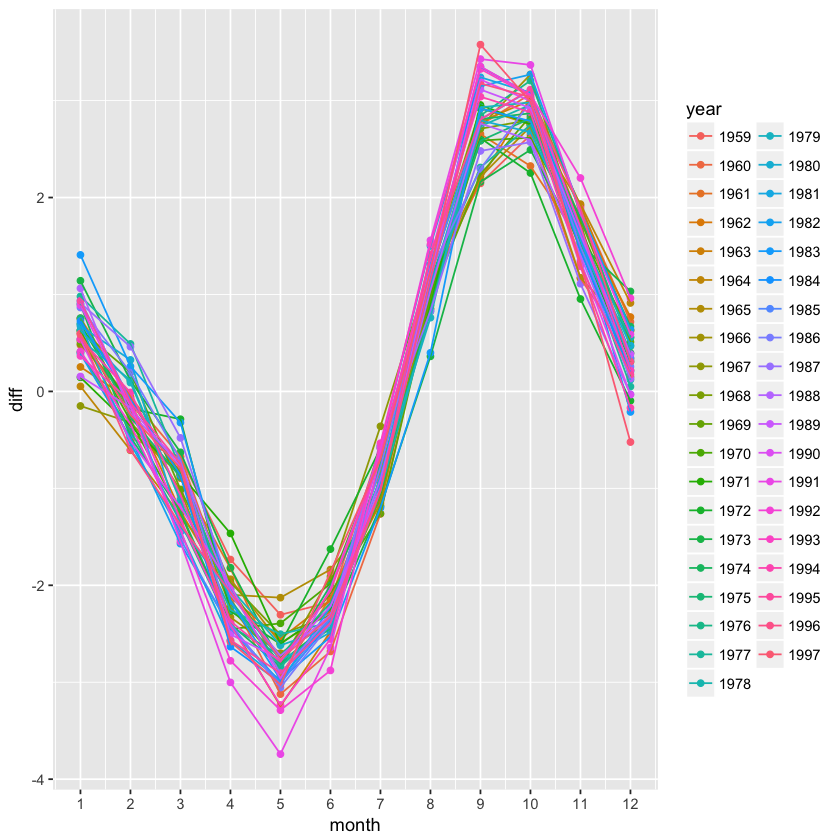

In [46]:
co2_plot %>% ggplot(aes(month,diff,color=year)) + geom_point() + geom_line() + scale_x_continuous(breaks=1:12)